In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

from shapely.geometry import box
import earthpy as et
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "Geoseries.notna", UserWarning)

sns.set(font_scale=1.5)
sns.set_style("white")

data= et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

In [2]:
country_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                        "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

In [3]:
print(country_boundary_us.crs)
print(state_boundary_us.crs)
print(pop_places.crs)

EPSG:4326
EPSG:4326
EPSG:4326


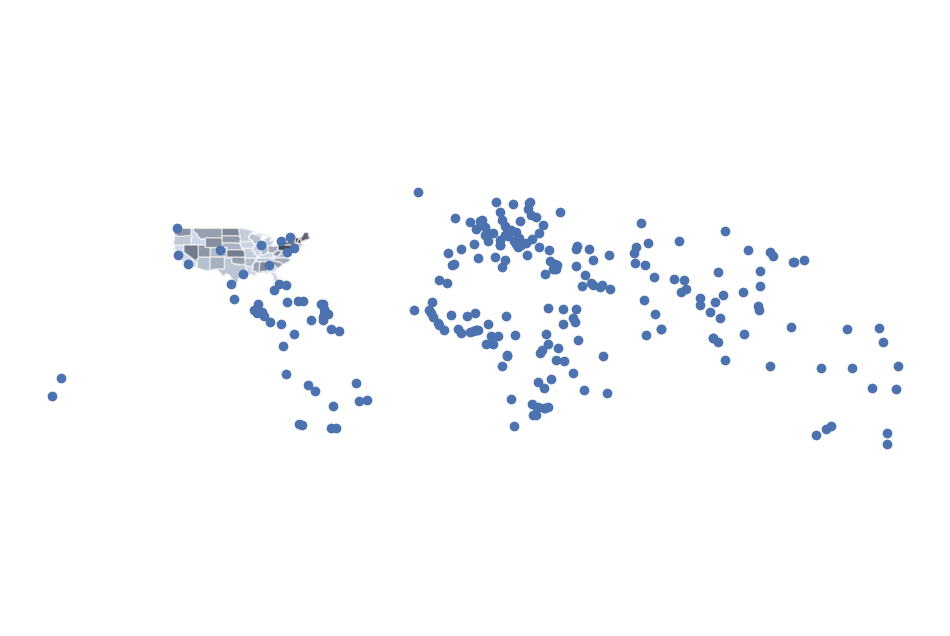

In [4]:
fig, ax = plt.subplots(figsize=(12,8))

country_boundary_us.plot(ax=ax, alpha=0.5)
state_boundary_us.plot(ax=ax, alpha=0.5, cmap="Greys")
pop_places.plot(ax=ax)

plt.axis("equal")
ax.set_axis_off()
plt.show()

In [5]:
points_clip = gpd.clip(pop_places, country_boundary_us)

points_clip[["name", "geometry", "scalerank", "natscale"]].head()

,name,geometry,scalerank,natscale
178,Miami,POINT (-80.22605 25.78956),1,300
177,Houston,POINT (-95.34193 29.82192),1,300
179,Atlanta,POINT (-84.40190 33.83196),1,300
216,Los Angeles,POINT (-118.18193 33.99192),0,600
175,San Francisco,POINT (-122.41717 37.76920),1,300


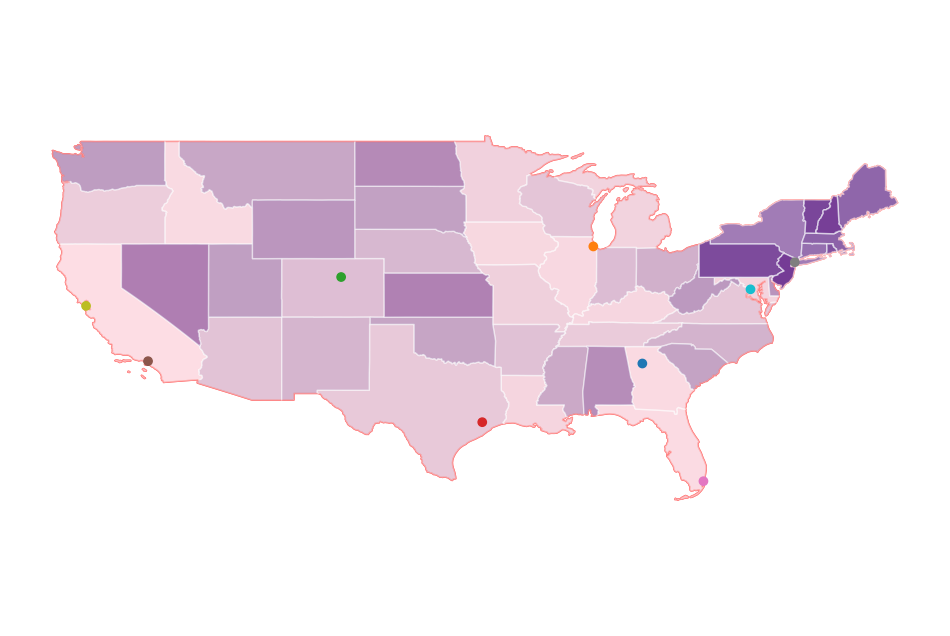

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

country_boundary_us.plot(ax=ax, alpha=1, color="pink", edgecolor="red")
state_boundary_us.plot(ax=ax, alpha=0.5, cmap="Purples")
points_clip.plot(ax=ax, column="name")

ax.set_axis_off()
plt.axis("equal")

plt.show()

In [7]:
ne_roads_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_10m_roads", "ne_10m_roads.shp")
ne_roads = gpd.read_file(ne_roads_path)


In [10]:
if (ne_roads.crs == country_boundary_us.crs):
    print("Both layers are in the same crs!",
    ne_roads.crs, country_boundary_us.crs)

Both layers are in the same crs! EPSG:4326 EPSG:4326


In [11]:
ne_roads_clip = gpd.clip(ne_roads, country_boundary_us)

ne_roads_clip = ne_roads_clip[~ne_roads_clip.is_empty]

print("The clipped data have fewer line objects", ne_roads_clip.shape, ne_roads.shape)


The clipped data have fewer line objects (7363, 32) (56601, 32)


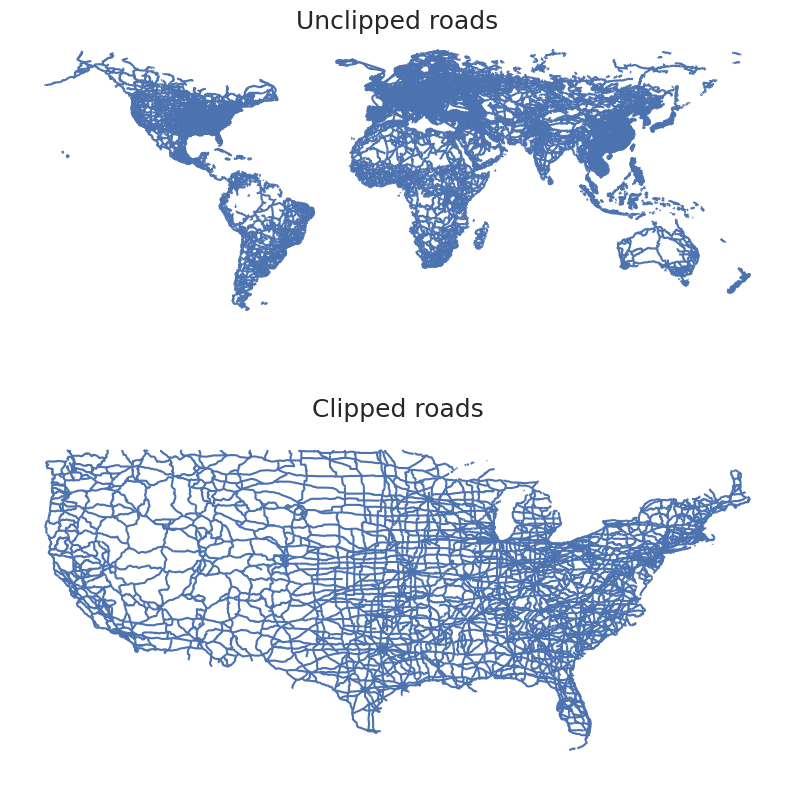

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ne_roads.plot(ax=ax1)
ne_roads_clip.plot(ax=ax2)

ax1.set_title("Unclipped roads")
ax2.set_title("Clipped roads")

ax1.set_axis_off()
ax2.set_axis_off()

plt.axis("equal")
plt.show()


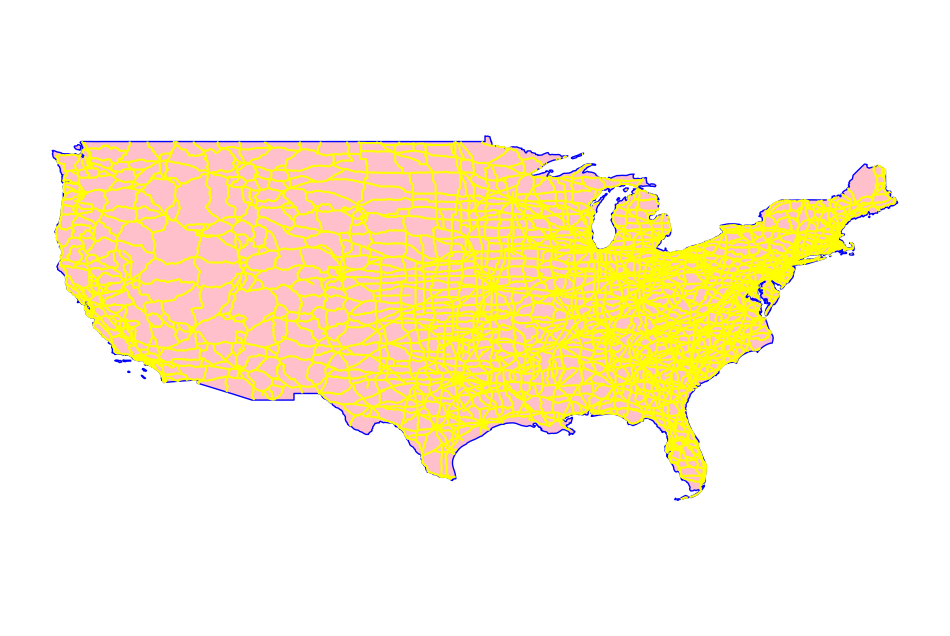

In [13]:
fig,ax = plt.subplots(figsize=(12,8))

country_boundary_us.plot(ax=ax, color="pink", edgecolor="blue", alpha=1)
ne_roads_clip.plot(ax=ax, color="yellow")

ax.set_axis_off()
plt.axis("equal")

plt.show()

In [20]:
country_boundary_us_sin = country_boundary_us.simplify(9.9, preserve_topology=True)

country_boundary_us_sin

0    MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...
dtype: geometry

<Axes: >

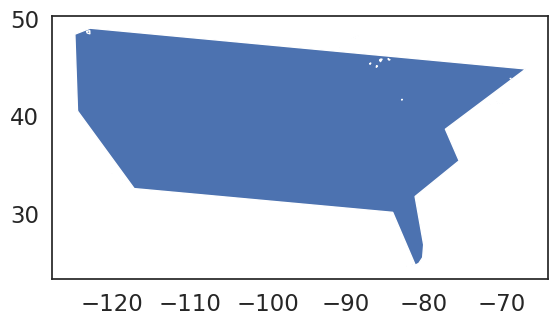

In [21]:
country_boundary_us_sin.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

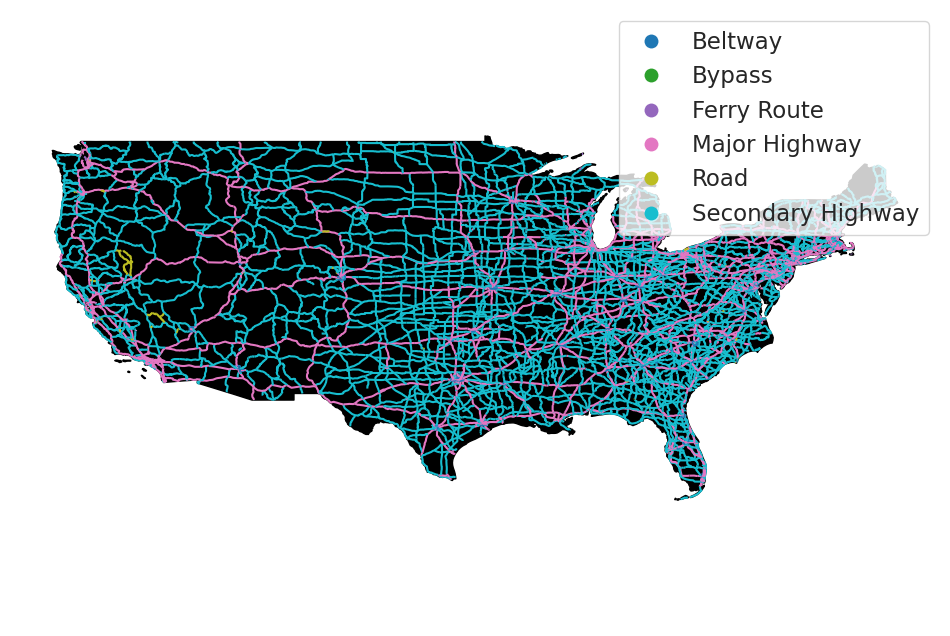

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

country_boundary_us.plot(ax=ax, alpha=1, color="black", edgecolor="black")
ne_roads_clip.plot(ax=ax, column="type", legend=True)

ax.set_axis_off()
plt.axis("equal")
plt.show

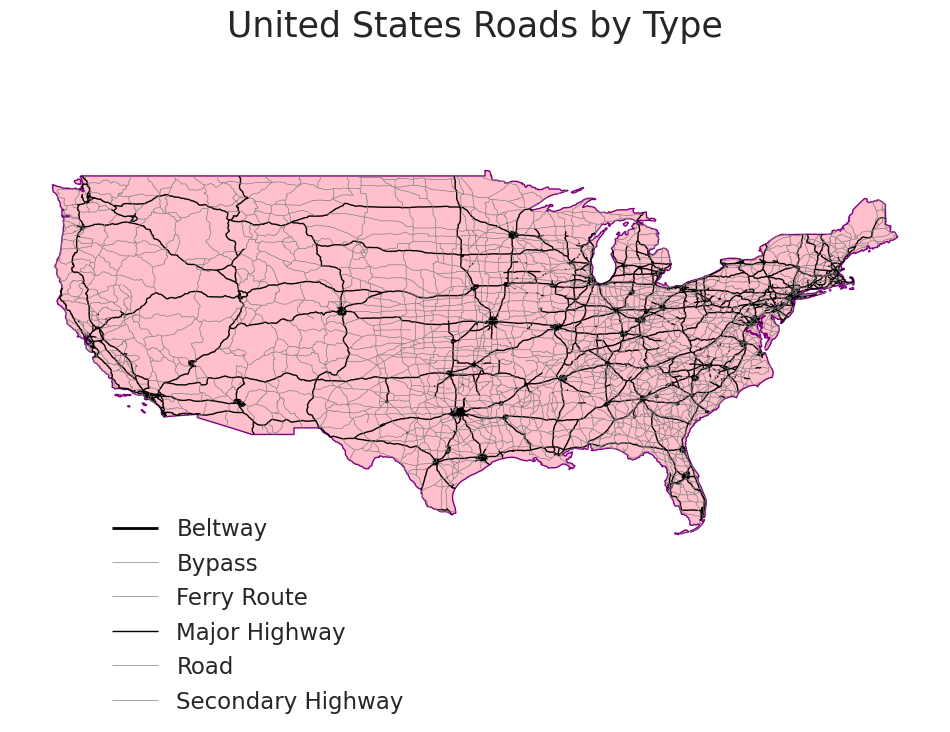

In [26]:
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['black', 1]}

fig, ax = plt.subplots(figsize=(12,8))

for ctype, data in ne_roads_clip.groupby("type"):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])
    
country_boundary_us.plot(alpha=1, color="pink", edgecolor="purple", ax=ax)

ax.legend(frameon=False, loc=(0.1, -0.1))

ax.set_title("United States Roads by Type", fontsize=25)
ax.set_axis_off()
plt.axis("equal")
plt.show()
